In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Define data directories and number of classes
data_dir = 'D:/Data/Stage_Luc/OneDrive_data/dl_disease/Données_algo/classes/subdivision_4_4/train/'  # Update with your dataset path
num_classes = 2  # Disease and Healthy

# Define data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,  # Adjust the validation split as needed
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [12]:
# Load the pretrained ResNet-50 model with custom output layer
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add additional layers if needed
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)



In [13]:
# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [17]:
# Load your validation dataset
batch_size = 100  # Adjust the batch size as needed

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training',  # Use the training subset
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation',  # Use the validation subset
)



Found 3779 images belonging to 2 classes.
Found 944 images belonging to 2 classes.


Epoch 1/5
37/37 [==============================] - 836s 23s/step - loss: 0.0859 - acc: 0.9677 - val_loss: 0.9425 - val_acc: 0.8511
Epoch 2/5
37/37 [==============================] - 958s 26s/step - loss: 0.0146 - acc: 0.9965 - val_loss: 1.0880 - val_acc: 0.8511
Epoch 3/5
37/37 [==============================] - 986s 27s/step - loss: 0.0101 - acc: 0.9976 - val_loss: 1.2322 - val_acc: 0.8511
Epoch 4/5
37/37 [==============================] - 757s 20s/step - loss: 0.0079 - acc: 0.9981 - val_loss: 1.2253 - val_acc: 0.8511
Epoch 5/5
37/37 [==============================] - 756s 20s/step - loss: 0.0096 - acc: 0.9970 - val_loss: 1.4331 - val_acc: 0.8511


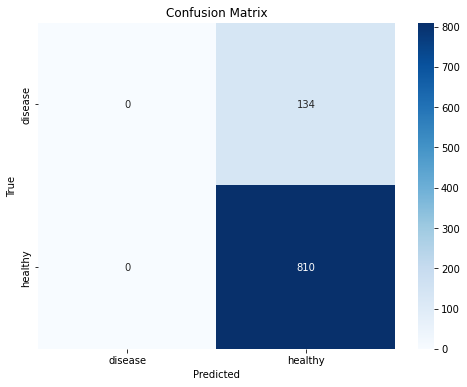

              precision    recall  f1-score   support

     disease       0.00      0.00      0.00       134
     healthy       0.86      1.00      0.92       810

    accuracy                           0.86       944
   macro avg       0.43      0.50      0.46       944
weighted avg       0.74      0.86      0.79       944



C:\Users\lebryo000\.conda\envs\r_cnnenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lebryo000\.conda\envs\r_cnnenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lebryo000\.conda\envs\r_cnnenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Train the model
num_epochs = 5  # Adjust the number of epochs as needed
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=num_epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Create a confusion matrix
true_labels = validation_generator.classes

predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
class_labels = list(validation_generator.class_indices.keys())
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

Found 4723 images belonging to 2 classes.
Found 1155 images belonging to 2 classes.
Epoch 1/5
73/73 [==============================] - 907s 12s/step - loss: 0.3484 - acc: 0.9367 - val_loss: 0.8090 - val_acc: 0.8611
Epoch 2/5
73/73 [==============================] - 910s 12s/step - loss: 0.0240 - acc: 0.9918 - val_loss: 0.8936 - val_acc: 0.8611
Epoch 3/5
73/73 [==============================] - 923s 13s/step - loss: 0.0211 - acc: 0.9940 - val_loss: 1.0214 - val_acc: 0.8611
Epoch 4/5
73/73 [==============================] - 918s 13s/step - loss: 0.0115 - acc: 0.9961 - val_loss: 1.1295 - val_acc: 0.8611
Epoch 5/5
73/73 [==============================] - 950s 13s/step - loss: 0.0130 - acc: 0.9964 - val_loss: 1.2230 - val_acc: 0.8611


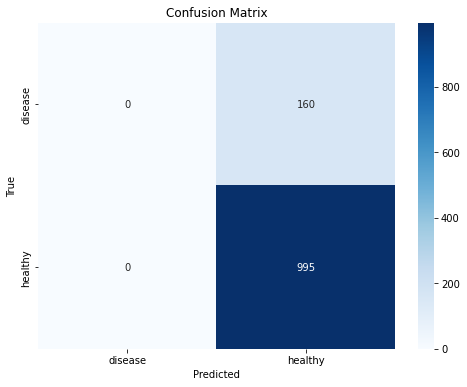

              precision    recall  f1-score   support

     disease       0.00      0.00      0.00       160
     healthy       0.86      1.00      0.93       995

    accuracy                           0.86      1155
   macro avg       0.43      0.50      0.46      1155
weighted avg       0.74      0.86      0.80      1155



C:\Users\lebryo000\.conda\envs\r_cnnenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lebryo000\.conda\envs\r_cnnenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lebryo000\.conda\envs\r_cnnenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


train_data_dir = 'D:/Data/Stage_Luc/OneDrive_data/dl_disease/Données_algo/classes/subdivision_4_4/train' 
val_data_dir = 'D:/Data/Stage_Luc/OneDrive_data/dl_disease/Données_algo/classes/subdivision_4_4/test'  
num_classes = 2  


datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the training and validation datasets
batch_size = 64  # Adjust the batch size as needed

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

validation_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

# Train the model
num_epochs = 5  # Adjust the number of epochs as needed
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=num_epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Create a confusion matrix
true_labels = validation_generator.classes

predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
class_labels = list(validation_generator.class_indices.keys())
print(classification_report(true_labels, predicted_labels, target_names=class_labels))


In [44]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define data directories
train_data_dir = 'D:/Data/Stage_Luc/OneDrive_data/dl_disease/Données_algo/classes/subdivision_4_4/train' 
val_data_dir = 'D:/Data/Stage_Luc/OneDrive_data/dl_disease/Données_algo/classes/subdivision_4_4/test'  
num_classes = 2  # Diseased and Healthy

# Define data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the pretrained ResNet-50 model with custom output layer
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)  # Add dropout for regularization
x = BatchNormalization()(x)  # Add batch normalization
x = Dense(512, activation='relu')(x)  # Additional dense layer
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the training and validation datasets
batch_size = 32  # Adjust the batch size as needed

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

validation_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

# Train the model
num_epochs = 10  # Adjust the number of epochs as needed
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=num_epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Create a confusion matrix
true_labels = validation_generator.classes

predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
class_labels = list(validation_generator.class_indices.keys())
print(classification_report(true_labels, predicted_labels, target_names=class_labels))


Found 4723 images belonging to 2 classes.
Found 1155 images belonging to 2 classes.
Epoch 1/10
 24/147 [===>..........................] - ETA: 12:03 - loss: 0.2236 - acc: 0.9089

In [43]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

new_image_path = 'D:/Data/Stage_Luc/OneDrive_data/dl_disease/Données_algo/classes/validation_fin/Diseased/Dis_1_7.jpg'
#new_image_path = 'D:/Data/Stage_Luc/OneDrive_data/dl_disease/Données_algo/classes/validation_fin/Healthy/heal_1_3.jpg'  
new_image = load_img(new_image_path, target_size=(224,224))
new_image = img_to_array(new_image) / 255.0
new_image = np.expand_dims(new_image, axis=0)
prediction = model.predict(new_image)

predicted_class_idx = np.argmax(prediction)
predicted_class = class_labels[np.argmax(prediction)]

print(f"La prédiction est: {predicted_class}")

The predicted class for the new image is: healthy
